# K 최근접 이웃( K-Nearest Neighbor)
- K : 이웃의 수
- Nearest: 거리

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2차원 공간에 4개 train data 설정
x = pd.DataFrame([[1,1],[2,3],[4,3],[10,8]], columns=['ax1','ax2'])
display(x)

# train data의 label 설정
y = pd.DataFrame(['a','a','b','b'], columns=['type'])
display(y)

# 3-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

# test data
x_test = pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
display(x_test)

pred = knn.predict(x_test)
print('분류:',pred,'\n')

,ax1,ax2
0,1,1
1,2,3
2,4,3
3,10,8


,type
0,a
1,a
2,b
3,b


,ax1,ax2
0,2,7
1,5,4


분류: ['a' 'a'] 



In [16]:
# test data와 train data와의 거리
print(knn.kneighbors(x_test,4)) # kneighbors(X=None, n_neighbors=None, return_distance=True)
                                # 입력한 데이터와 이웃들의 거리와 인덱스를 반환

(array([[4.        , 4.47213595, 6.08276253, 8.06225775],
       [1.41421356, 3.16227766, 5.        , 6.40312424]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]], dtype=int64))


In [14]:
from math import sqrt
print('test data(2,7)와 (10,8)과의 거리: ',sqrt((2-10)**2+(7-8)**2))

test data(2,7)와 (10,8)과의 거리:  8.06225774829855


In [19]:
sample = pd.concat([x.join(y), x_test])
sample

,ax1,ax2,type
0,1,1,a
1,2,3,a
2,4,3,b
3,10,8,b
0,2,7,NaN
1,5,4,NaN


In [22]:
sample.reset_index(inplace=True)
sample.drop('index', axis=1, inplace=True)
sample.fillna('u', inplace=True)



[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]


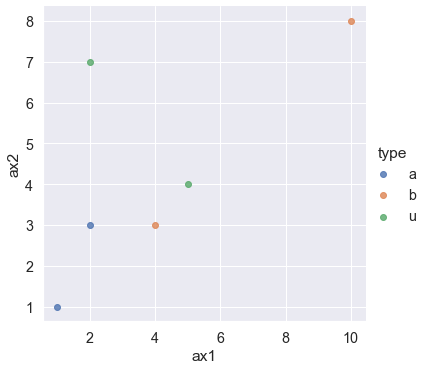

In [24]:
sns.lmplot('ax1','ax2', data=sample, hue='type', fit_reg=False)
print('\n')
print(knn.predict_proba(x_test))

In [30]:
# 3-NN
# 맨해튼 거리
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan')
knn.fit(x,y)

# test data
x_test = pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred = knn.predict(x_test)
print('분류: ',pred,'\n')

# test data와 train data와의 거리
print(knn.kneighbors(x_test,4))

분류:  ['a' 'a'] 

(array([[4., 6., 7., 9.],
       [2., 4., 7., 9.]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]], dtype=int64))


In [31]:
sample = pd.concat([x.join(y), x_test.join(pd.DataFrame(pred,columns=['type']))])
sample

,ax1,ax2,type
0,1,1,a
1,2,3,a
2,4,3,b
3,10,8,b
0,2,7,a
1,5,4,a


In [32]:
sample.reset_index(inplace=True)
sample.drop('index',axis=1,inplace=True) # 반드시 reset_index를 먼저 수행해야 함

[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]


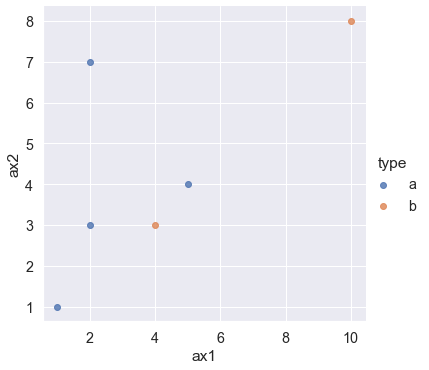

In [34]:
sns.lmplot('ax1','ax2', data=sample, hue='type',fit_reg=False)
print(knn.predict_proba(x_test))

분류:  ['a' 'a'] 

(array([[4.        , 4.47213595, 6.08276253, 8.06225775],
       [1.41421356, 3.16227766, 5.        , 6.40312424]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]], dtype=int64))

 [[0.5 0.5]
 [0.5 0.5]]


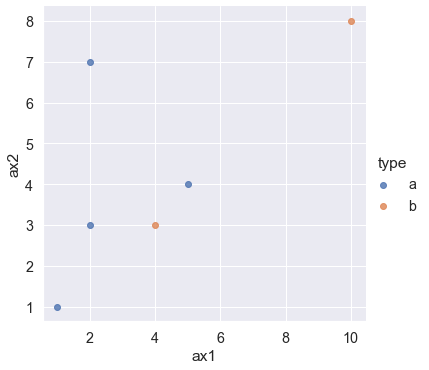

In [36]:
# 2-NN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x,y)

# test data
x_test = pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred = knn.predict(x_test)
print('분류: ',pred,'\n')

# test data와 train data와의 거리
print(knn.kneighbors(x_test,4))

sample = pd.concat([x.join(y), x_test.join(pd.DataFrame(pred,columns=['type']))])
sample.reset_index(inplace=True)
sample.drop('index',axis=1,inplace=True) # 반드시 reset_index를 먼저 수행해야 함

sns.lmplot('ax1','ax2', data=sample, hue='type',fit_reg=False)
print('\n',knn.predict_proba(x_test))

분류:  ['a' 'b'] 

(array([[4.        , 4.47213595, 6.08276253, 8.06225775],
       [1.41421356, 3.16227766, 5.        , 6.40312424]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]], dtype=int64))

 [[0.52786405 0.47213595]
 [0.30901699 0.69098301]]

 0.5278640447218036 0.47213595527819635


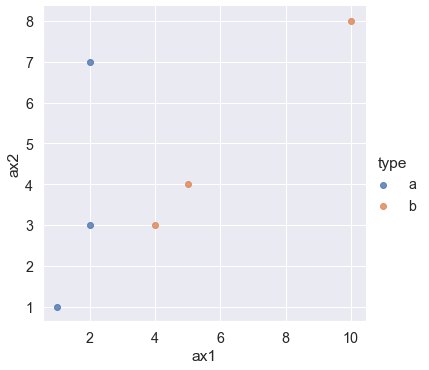

In [39]:
# 2-NN classifier
# 가중치 부여
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(x,y)

# test data
x_test = pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred = knn.predict(x_test)
print('분류: ',pred,'\n')

# test data와 train data와의 거리
print(knn.kneighbors(x_test,4))

sample = pd.concat([x.join(y), x_test.join(pd.DataFrame(pred,columns=['type']))])
sample.reset_index(inplace=True)
sample.drop('index',axis=1,inplace=True) # 반드시 reset_index를 먼저 수행해야 함

sns.lmplot('ax1','ax2', data=sample, hue='type',fit_reg=False)
print('\n',knn.predict_proba(x_test))

ap = 1/4
bp = 1/4.47213595
n = 1/(ap+bp)

print('\n',ap*n, bp*n)